In [58]:
# Task 2.1
class Stack:
    def __init__(self, size):
        self.size = size
        self.array = [None for _ in range(self.size)]
        self.top = -1
    
    def isFull(self):
        return self.top == self.size - 1
    
    def isEmpty(self):
        return self.top == -1
    
    def push(self, data):
        if not self.isFull():
            self.top = (self.top + 1)
            self.array[self.top] = data
            return True
        return False
            
    
    def pop(self):
        if not self.isEmpty():
            ret = self.array[self.top]
            self.array[self.top] = None
            self.top = (self.top - 1)
            return ret
        return
    
    def peek(self):
        return self.array[self.top]

In [194]:
def solver(expr):
    s = Stack(len(expr))
    for idx, char in enumerate(expr):
        if char == '(':
            s.push(idx)
        if char == ')':
            start_location = s.pop()
            end_location = idx
            size = end_location - start_location + 1
            print(expr[:start_location],expr[start_location:end_location+1],expr[end_location+1:], sep='|')
            tmp = eval_exp(expr[start_location:end_location+1]) \
                  if len(str(eval_exp(expr[start_location:end_location+1]))) < size \
                  else str(eval_exp(expr[start_location:end_location+1]))[:size]
            print(size, tmp)
            expr = f'{expr[:start_location]}{tmp:^{size}}{expr[end_location+1:]}'
    return expr.replace('@', '-').replace(' ', '')

def eval_exp(s):
    s = s.replace('(','')
    s= s.replace(')','')
    s = s.replace(' ','')
    operators = ['+', '-', '/', '*']
    check = sum([str(i) in operators for i in s if str(i) in operators])
    if check != 1:
        return s    
    operator = [i for i in operators if i in s][0]
    s = s.split(operator)
    if operator == '+':
        return str((float(s[0].replace('@', '-'))) + (float(s[1].replace('@', '-')))).replace('-', '@')
    elif operator == '-':
        return str((float(s[0].replace('@', '-'))) - (float(s[1].replace('@', '-')))).replace('-', '@')
    elif operator == '/':
        return str((float(s[0].replace('@', '-'))) / (float(s[1].replace('@', '-')))).replace('-', '@')
    else:
        return str((float(s[0].replace('@', '-'))) * (float(s[1].replace('@', '-')))).replace('-', '@')

In [159]:
solver('((1*7)+6)')

(|(1*7)|+6)
5 7
|(  7  +6)|
9 13


'13'

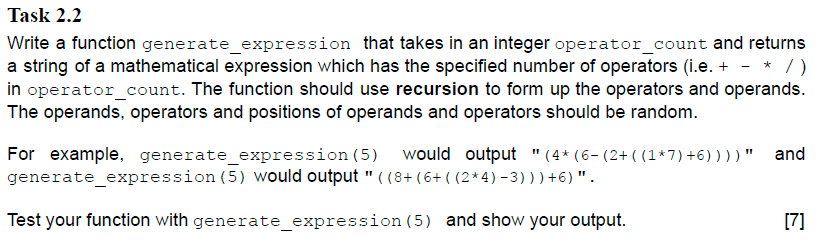

In [102]:
import random
def generate_expression(no_of_ops):
    operators = ['+', '-', '/', '*']
    # (4 * resolve())
    # (4 * (6 - resolve()))
    # ...
    def resolve(layer):
        if layer == 0:
            return random.randint(1,9)
        left_or_right = random.sample(['LEFT', 'RIGHT'], 1)[0]
        if left_or_right == 'LEFT':
            number = random.randint(1,9)
            operator = random.sample(operators, 1)[0]
            return f'({number}{operator}{resolve(layer-1)})'
        else:
            number = random.randint(1,9)
            operator = random.sample(operators, 1)[0]
            return f'({resolve(layer-1)}{operator}{number})'
    return f'({resolve(no_of_ops)})'

In [214]:
expr = generate_expression(5)
print(solver(expr))
print(eval(expr))

((6+(6-(3*(4+|(5/3)|)))))
5 1.666
((6+(6-(3*|(4+1.666)|))))
9 5.666
((6+(6-|(3*  5.666  )|)))
13 16.998
((6+|(6-   16.998    )|))
17 @10.9980000000000
(|(6+@10.9980000000000)|)
21 @4.997999999999999
|( @4.997999999999999  )|
23 @4.997999999999999
-4.997999999999999
-5.0


In [156]:
int('0.06666666666')

ValueError: invalid literal for int() with base 10: '0.06666666666'

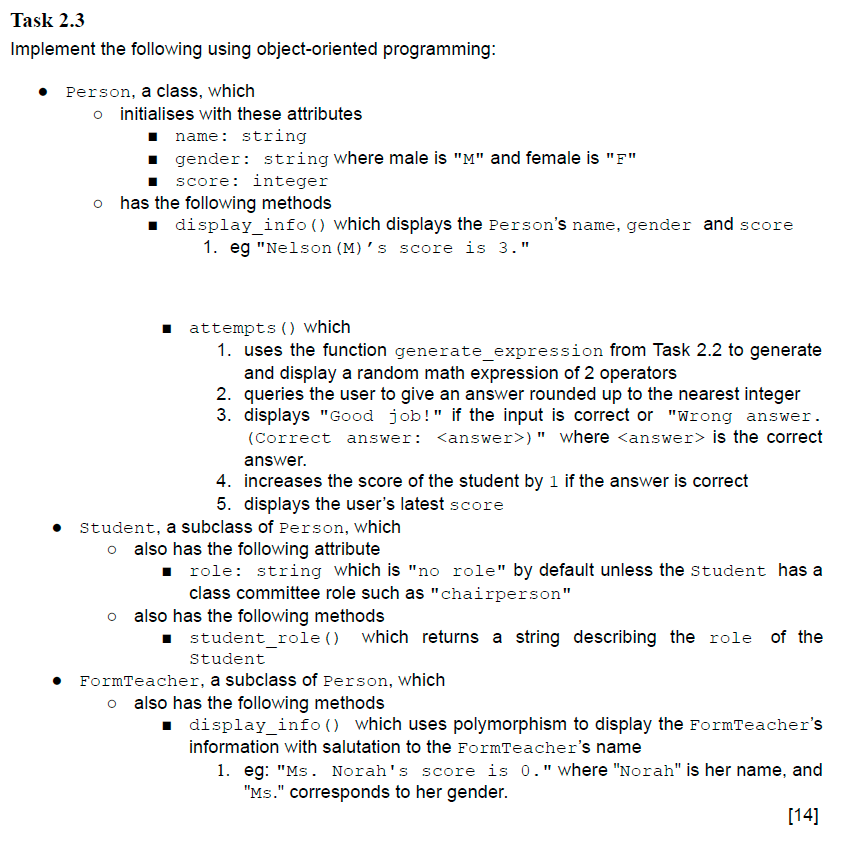

In [220]:
class Person:
    def __init__(self, name, gender):
        self.name = name
        self.gender = gender
        self.score = 0
    
    def display_info(self):
        print(f'{self.name}({self.gender})\'s score is {self.score}')
    
    def attempts(self):
        random_expr = generate_expression(2)
        print(random_expr)
        answer = int(input('ANSWER (nearest int): '))
        if answer != int(float(solver(random_expr))):
            print(f'Wrong Answer\nCorrect answer: {int(float(solver(random_expr)))}')
        else:
            print('Good Job!')
            self.score += 1
class Student(Person):
    def __init__(self, name, gender, role):
        self.role = role
        super().__init__(name, gender)
    
    def student_role(self):
        return self.role
    
class FormTeacher(Person):
    def display_info(self):
        print(f'{"Ms." if self.gender == "F" else "Mr."} {self.name}({self.gender})\'s score is {self.score}')

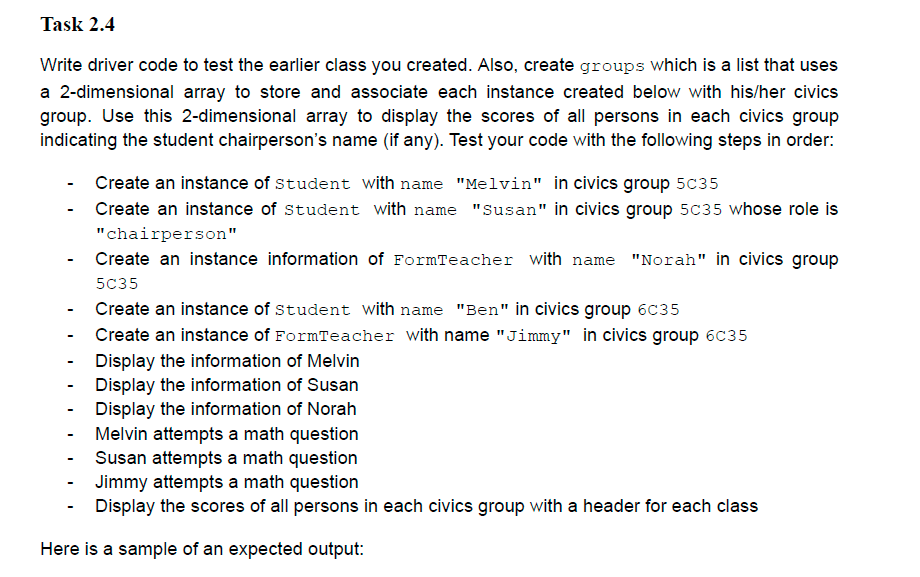

In [223]:
_5c35 = [Student('Melvin', 'M', 'no role'), Student('Susan', 'F', 'chairperson'), FormTeacher('Norah', 'F')]
_6c35 = [Student('Ben', 'M', 'no role'), FormTeacher('Jimmy', 'M')]
for person in _5c35:
    person.display_info()
_5c35[0].attempts()
_5c35[1].attempts()
_6c35[1].attempts()

print('5c35')
for person in _5c35:
    person.display_info()

print('6c35')
for person in _6c35:
    person.display_info()

Melvin(M)'s score is 0
Susan(F)'s score is 0
Ms. Norah(F)'s score is 0
((7+(8/5)))
ANSWER (nearest int): 1
((7+|(8/5)|))
5 1.6
(|(7+ 1.6 )|)
9 8.6
|(   8.6   )|
11 8.6
((7+|(8/5)|))
5 1.6
(|(7+ 1.6 )|)
9 8.6
|(   8.6   )|
11 8.6
Wrong Answer
Correct answer: 8
((7+(1-6)))
ANSWER (nearest int): 3
((7+|(1-6)|))
5 @5.0
(|(7+@5.0 )|)
9 2.0
|(   2.0   )|
11 2.0
((7+|(1-6)|))
5 @5.0
(|(7+@5.0 )|)
9 2.0
|(   2.0   )|
11 2.0
Wrong Answer
Correct answer: 2
((5/(4*2)))
ANSWER (nearest int): 3
((5/|(4*2)|))
5 8.0
(|(5/ 8.0 )|)
9 0.625
|(  0.625  )|
11 0.625
((5/|(4*2)|))
5 8.0
(|(5/ 8.0 )|)
9 0.625
|(  0.625  )|
11 0.625
Wrong Answer
Correct answer: 0
5c35
Melvin(M)'s score is 0
Susan(F)'s score is 0
Ms. Norah(F)'s score is 0
6c35
Ben(M)'s score is 0
Mr. Jimmy(M)'s score is 0
